#**IMDB Review Classification**

The model is built using Tensor Flow and is an example of binary Text Classification

In [25]:
## Importing of libraries and packages
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_datasets as tfds

print("TF Version:", tf.__version__)
print("TF Eager mode:", tf.executing_eagerly())
print("TF Hub Version:", hub.__version__)
print("GPU is","available" if tf.config.list_physical_devices('GPU') else "Not available" )

TF Version: 2.3.0
TF Eager mode: True
TF Hub Version: 0.9.0
GPU is Not available


In [7]:
## Loading the Data set from TensorFlow Datasets
train_data, test_data = tfds.load(name="imdb_reviews", split=["train", "test"], batch_size=-1, as_supervised=True)

train_examples, train_labels = tfds.as_numpy(train_data)
test_examples, test_labels = tfds.as_numpy(test_data)

In [8]:
print("Training entries: {}, test entries: {}".format(len(train_examples), len(test_examples)))

Training entries: 25000, test entries: 25000


In [9]:
train_examples[:10]

array([b"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it.",
       b'I have been known to fall asleep during films, but this is usually due to a combination of things including, really tired, being warm and comfortable on the sette and having just eaten a lot. However on this occasion I fell asleep because the film was rubbish. The plot 

In [10]:
train_labels[:10] ## 0 for negative reviews and 1 for positive reviews

array([0, 0, 0, 1, 1, 1, 0, 0, 0, 0])

In [11]:
## Building the model
model = "https://tfhub.dev/google/tf2-preview/gnews-swivel-20dim/1"
hub_layer = hub.KerasLayer(model, output_shape=[20], input_shape=[], 
                           dtype=tf.string, trainable=True)
hub_layer(train_examples[:3])

<tf.Tensor: shape=(3, 20), dtype=float32, numpy=
array([[ 1.765786  , -3.882232  ,  3.9134233 , -1.5557289 , -3.3362343 ,
        -1.7357955 , -1.9954445 ,  1.2989551 ,  5.081598  , -1.1041286 ,
        -2.0503852 , -0.72675157, -0.65675956,  0.24436149, -3.7208383 ,
         2.0954835 ,  2.2969332 , -2.0689783 , -2.9489717 , -1.1315987 ],
       [ 1.8804485 , -2.5852382 ,  3.4066997 ,  1.0982676 , -4.056685  ,
        -4.891284  , -2.785554  ,  1.3874227 ,  3.8476458 , -0.9256538 ,
        -1.896706  ,  1.2113281 ,  0.11474707,  0.76209456, -4.8791065 ,
         2.906149  ,  4.7087674 , -2.3652055 , -3.5015898 , -1.6390051 ],
       [ 0.71152234, -0.6353217 ,  1.7385626 , -1.1168286 , -0.5451594 ,
        -1.1808156 ,  0.09504455,  1.4653089 ,  0.66059524,  0.79308075,
        -2.2268345 ,  0.07446612, -1.4075904 , -0.70645386, -1.907037  ,
         1.4419787 ,  1.9551861 , -0.42660055, -2.8022065 ,  0.43727064]],
      dtype=float32)>

In [12]:
model = tf.keras.Sequential()
model.add(hub_layer)
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(1))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 20)                400020    
_________________________________________________________________
dense (Dense)                (None, 16)                336       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 400,373
Trainable params: 400,373
Non-trainable params: 0
_________________________________________________________________


In [13]:
## Adding the loss function and optimizer to the model
### Loss function - Binary Cross entropy
### Optimizer - Adam
model.compile(optimizer='adam', loss=tf.losses.BinaryCrossentropy(from_logits=True),
              metrics=[tf.metrics.BinaryAccuracy(threshold=0.0, name='accuracy')])

In [14]:
## Creating a Validation set
x_val = train_examples[:10000]
partial_x_train = train_examples[10000:]

y_val = train_labels[:10000]
partial_y_train = train_labels[10000:]

In [15]:
## Training the model
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=40,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=1)

Epoch 1/40
30/30 [==============================] - 2s 66ms/step - loss: 0.6758 - accuracy: 0.6236 - val_loss: 0.6206 - val_accuracy: 0.6518
Epoch 2/40
30/30 [==============================] - 2s 61ms/step - loss: 0.5930 - accuracy: 0.6873 - val_loss: 0.5835 - val_accuracy: 0.6952
Epoch 3/40
30/30 [==============================] - 2s 61ms/step - loss: 0.5580 - accuracy: 0.7199 - val_loss: 0.5539 - val_accuracy: 0.7203
Epoch 4/40
30/30 [==============================] - 2s 61ms/step - loss: 0.5227 - accuracy: 0.7475 - val_loss: 0.5242 - val_accuracy: 0.7462
Epoch 5/40
30/30 [==============================] - 2s 60ms/step - loss: 0.4892 - accuracy: 0.7676 - val_loss: 0.4976 - val_accuracy: 0.7661
Epoch 6/40
30/30 [==============================] - 2s 60ms/step - loss: 0.4568 - accuracy: 0.7889 - val_loss: 0.4721 - val_accuracy: 0.7812
Epoch 7/40
30/30 [==============================] - 2s 60ms/step - loss: 0.4274 - accuracy: 0.8086 - val_loss: 0.4485 - val_accuracy: 0.7930
Epoch 8/40
30

In [16]:
## Evaluating the model
results = model.evaluate(test_data, test_labels)
print(results)

782/782 [==============================] - 3s 4ms/step - loss: 0.4350 - accuracy: 0.8547
[0.4349846839904785, 0.8547199964523315]


In [18]:
## Plotting Accuracy and Loss over time/epochs
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

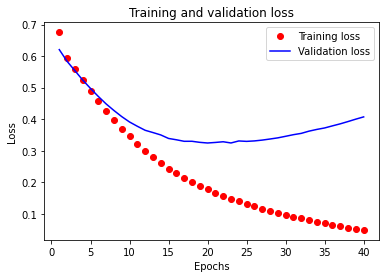

In [23]:
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'ro', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

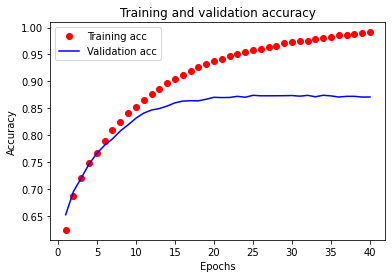

In [22]:
plt.clf()   # clear figure

plt.plot(epochs, acc, 'ro', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()